In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
nvda_medium_data = yf.download("NVDA", period="2y", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [3]:
nvda_medium_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,,
2023-01-17 14:30:00+00:00,17.599989,17.599989,17.684000,17.065601,17.100000,16123450
2023-01-17 15:30:00+00:00,17.333000,17.333000,17.632000,17.281090,17.598499,8237155
2023-01-17 16:30:00+00:00,17.491001,17.491001,17.582001,17.324009,17.337500,5463364
2023-01-17 17:30:00+00:00,17.580999,17.580999,17.618999,17.486000,17.491001,4031707
2023-01-17 18:30:00+00:00,17.661999,17.661999,17.703999,17.562099,17.580999,4857656


In [4]:
nvda_medium_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,,
2025-01-14 19:30:00+00:00,130.795807,130.795807,132.039993,130.050003,131.709503,21614619
2025-01-14 20:30:00+00:00,131.850006,131.850006,131.850006,130.460007,130.794998,15064220
2025-01-15 14:30:00+00:00,134.199997,134.199997,134.550003,131.289993,133.630005,53514058
2025-01-15 15:30:00+00:00,134.389893,134.389893,135.589996,133.940002,134.210007,28196095
2025-01-15 16:30:00+00:00,133.820007,133.820007,134.470001,133.699997,134.380005,3032906


In [5]:
nvda_medium_data.shape

(3490, 6)

In [6]:
nvda_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2023-01-17 14:30:00+00:00 to 2025-01-15 16:30:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  3490 non-null   float64
 1   (Close, NVDA)      3490 non-null   float64
 2   (High, NVDA)       3490 non-null   float64
 3   (Low, NVDA)        3490 non-null   float64
 4   (Open, NVDA)       3490 non-null   float64
 5   (Volume, NVDA)     3490 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.9 KB


In [7]:
# check for the missing values
nvda_medium_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,NVDA,0
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


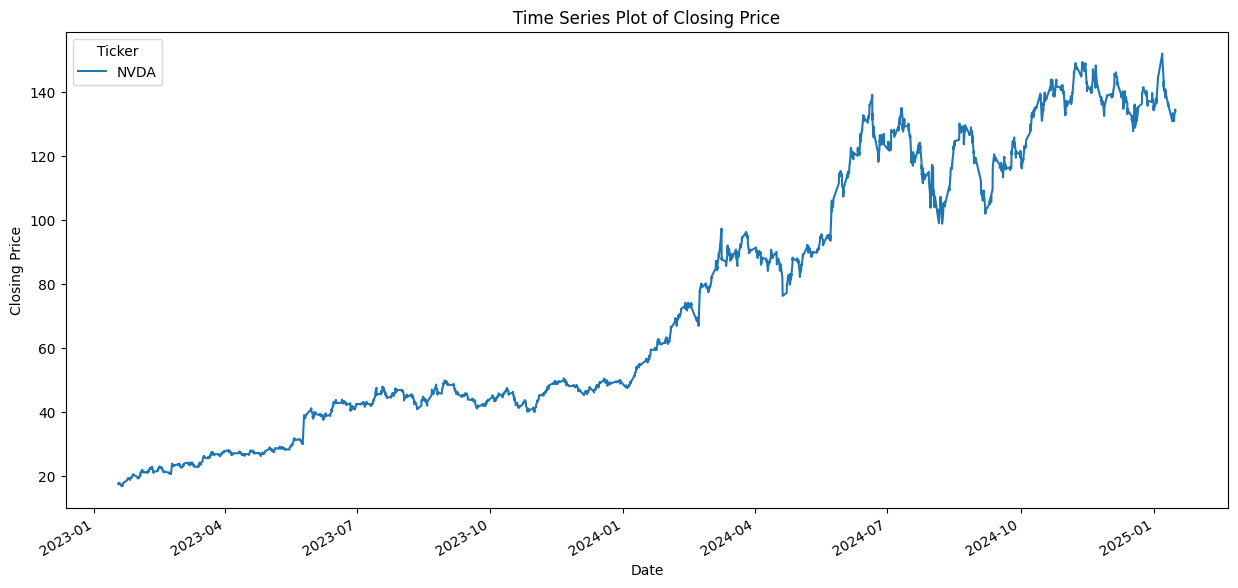

In [8]:
# time series plot
nvda_medium_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

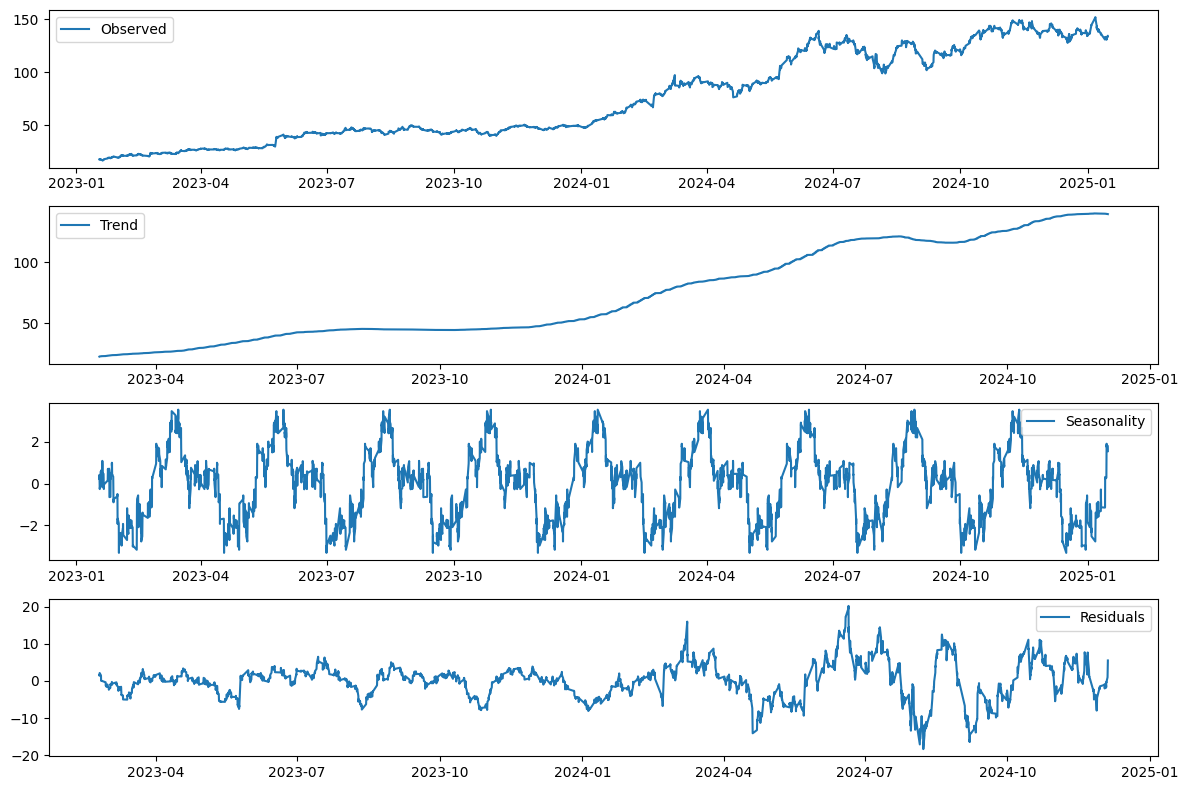

In [9]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(nvda_medium_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

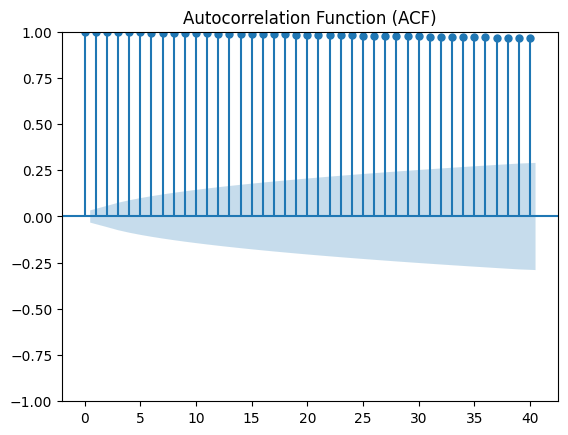

In [10]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_medium_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

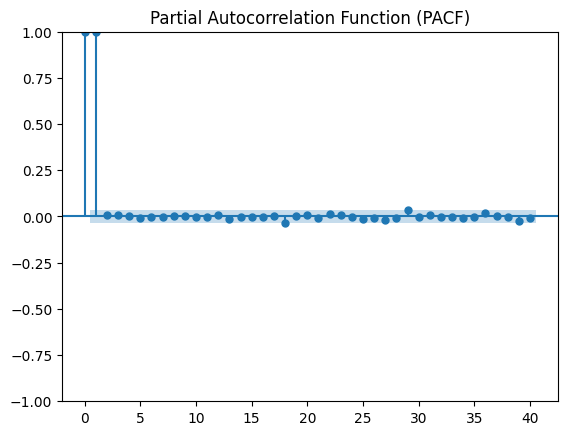

In [11]:
plt.figure(figsize=(10, 5))
plot_pacf(nvda_medium_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [12]:
# get the Date out of the index
nvda_medium_data.reset_index(inplace=True)

In [13]:
nvda_medium_data

Price,Datetime,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2023-01-17 14:30:00+00:00,17.599989,17.599989,17.684000,17.065601,17.100000,16123450
1,2023-01-17 15:30:00+00:00,17.333000,17.333000,17.632000,17.281090,17.598499,8237155
2,2023-01-17 16:30:00+00:00,17.491001,17.491001,17.582001,17.324009,17.337500,5463364
3,2023-01-17 17:30:00+00:00,17.580999,17.580999,17.618999,17.486000,17.491001,4031707
4,2023-01-17 18:30:00+00:00,17.661999,17.661999,17.703999,17.562099,17.580999,4857656
...,...,...,...,...,...,...,...
3485,2025-01-14 19:30:00+00:00,130.795807,130.795807,132.039993,130.050003,131.709503,21614619
3486,2025-01-14 20:30:00+00:00,131.850006,131.850006,131.850006,130.460007,130.794998,15064220
3487,2025-01-15 14:30:00+00:00,134.199997,134.199997,134.550003,131.289993,133.630005,53514058


In [14]:
# isolet the Date and Sales columns
nvda_medium_data = nvda_medium_data[['Datetime', 'Close']]

In [15]:
nvda_medium_data

Price,Datetime,Close
Ticker,,NVDA
0,2023-01-17 14:30:00+00:00,17.599989
1,2023-01-17 15:30:00+00:00,17.333000
2,2023-01-17 16:30:00+00:00,17.491001
3,2023-01-17 17:30:00+00:00,17.580999
4,2023-01-17 18:30:00+00:00,17.661999
...,...,...
3485,2025-01-14 19:30:00+00:00,130.795807
3486,2025-01-14 20:30:00+00:00,131.850006
3487,2025-01-15 14:30:00+00:00,134.199997


In [16]:
# Split into training and testing sets based on index
train_size = int(len(nvda_medium_data) * 0.8)  # 80% for training
train_data = nvda_medium_data[:train_size]
test_data = nvda_medium_data[train_size:]

In [17]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [18]:
train_data

Price,Close
Ticker,NVDA
Datetime,
2023-01-17 14:30:00+00:00,17.599989
2023-01-17 15:30:00+00:00,17.333000
2023-01-17 16:30:00+00:00,17.491001
2023-01-17 17:30:00+00:00,17.580999
2023-01-17 18:30:00+00:00,17.661999
...,...
2024-08-19 19:30:00+00:00,129.990005
2024-08-20 13:30:00+00:00,127.310204


In [19]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2023-01-17 14:30:00+0000', tz='UTC'),
 Timestamp('2024-08-20 16:30:00+0000', tz='UTC'))

In [20]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2024-08-20 17:30:00+0000', tz='UTC'),
 Timestamp('2025-01-15 16:30:00+0000', tz='UTC'))

In [21]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [22]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [23]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [24]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0729
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 6.1207e-04
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.4940e-04
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 3.0422e-04
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 2.1569e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
22.808515787124634


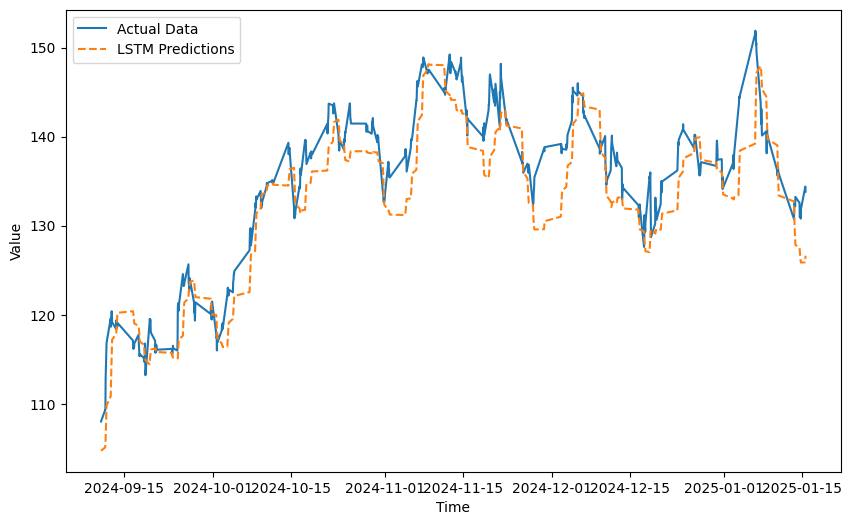

In [25]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [26]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

2.3447455515860427


In [27]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

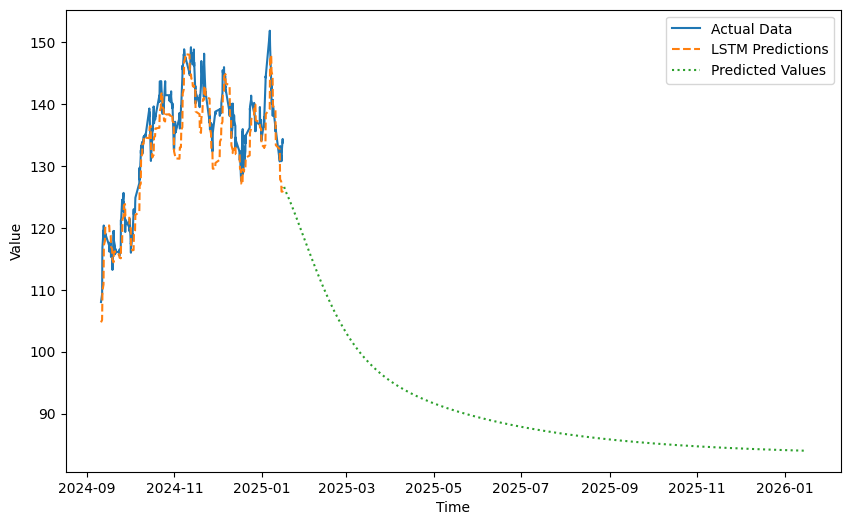

In [28]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()